## Telecom_Churn Case Study

### Telecom Churn Case Study
We have 21 Predictor variables to predict whether a customer will churn or not(move to another telecom provider or not).

The model building process mainly involves the following steps:
1. Data cleaning and preparation

2. Preprocessing steps

3. Test-train split

4. Model Building using RFE, p-values and VIFs

5. Model Evaluation using different metrics

6. Predictions on the test set

## Step1: Import and Merging the Data

In [169]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [170]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)

In [171]:
# Import the dataset
telecom=pd.read_csv("D:\\IBM_Data_Science\\Data_set\\telecom.csv")
telecom.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


## Step2 : Inspecting the DataFrame

In [172]:
## Shape of dataframe
telecom.shape

(7043, 21)

In [173]:
# Descriptive statictis analysis numerical variable
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [174]:
## Look at all columns in dataframe and their datatypes and null values
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## Step 3 Data Preparation 

**Converting some binary variables(Yes/No) to 0/1**

In [175]:
#List of variales to map
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map Function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
telecom[varlist] = telecom[varlist].apply(binary_map)

In [176]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


**For categorical variables with multiple levels, creating dummy features**

In [177]:
# Creating a dummy variable for some of the categorical variables and dropping the first dummy of each so we total_levels -1.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [178]:
# Creating dummy variables for the remaining categorical variables and "dropping the level with big names" but not default drop_first.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_"No phone service" column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
# Dropping OnlineSecurity_"No internet service" column
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
# Dropping OnlineBackup_"No internet service" column
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
# Dropping DeviceProtection_"No internet service" column
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
# Dropping TechSupport_"No internet service" column
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
# Dropping StreamingTV_"No internet service" column
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
# Dropping StreamingMovies_"No internet service" column
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [179]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


### Dropping the repeated variables

In [180]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [181]:
#The "TotalCharges" varaible was imported as a string we need to convert it to float

# On keen observation with value_counts we observe that there are empty values with " "(space) that cannot be converted into float
display("Before Converting",telecom.TotalCharges.value_counts().head())

# Converting into float datatype
# pd.DataFrame.convert_dtypes?
telecom['TotalCharges'] = pd.to_numeric(telecom.TotalCharges, errors='coerce') 
# Using errors=’coerce’. It will replace all non-numeric(including space ' ') values with NaN and these NaN are removed from the dataframe

# Now again check TotalCharges records with " " are removed
display("After Converting",telecom.TotalCharges.value_counts().head())
display(telecom.TotalCharges.shape)

telecom.info()
# Now here TotalCharges values are 7032 in which 11 are Null values so we remove the remove in further steps.

'Before Converting'

         11
20.2     11
19.75     9
20.05     8
19.9      8
Name: TotalCharges, dtype: int64

'After Converting'

20.20    11
19.75     9
20.05     8
19.90     8
19.65     8
Name: TotalCharges, dtype: int64

(7043,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

## Cheking for Outliers

In [182]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [183]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


- From the distribution shown above, you can see that there no outliers in our data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [184]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [185]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [186]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [187]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

#### Now the dataframe is free from outliers and missing values

In [188]:
### Step 5: Feature Scaling

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
# Putting feature variable to x
X = telecom.drop(['Churn', 'customerID'], axis = 1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [191]:
# Putting response variable to Y
y=telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Step5: Feature Scaling

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
scaler=StandardScaler()

In [195]:
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
2790,0.723700,1,1,1.483236,1.441721,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
898,-0.829194,1,1,1.126921,-0.508566,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1
3965,0.805431,1,1,1.378827,1.472845,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
5201,-0.951790,1,1,-1.491582,-0.929575,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1274,1.214088,1,1,1.201498,1.920335,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1


In [196]:
churn_rate = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn_rate

26.578498293515356

- We have almost 27% churn rate.
- Checking the churn rate is important since you usually want your data to have a balance between the 0s and 1s (in this case churn and not-churn)
- in this case, we have about a 27% churn rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

#### If you have class imbalance in your dataset then study how to deal with it here.
https://tinyurl.com/57ewvt2t 

### Step 6: Looking at the correlations¶

In [197]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

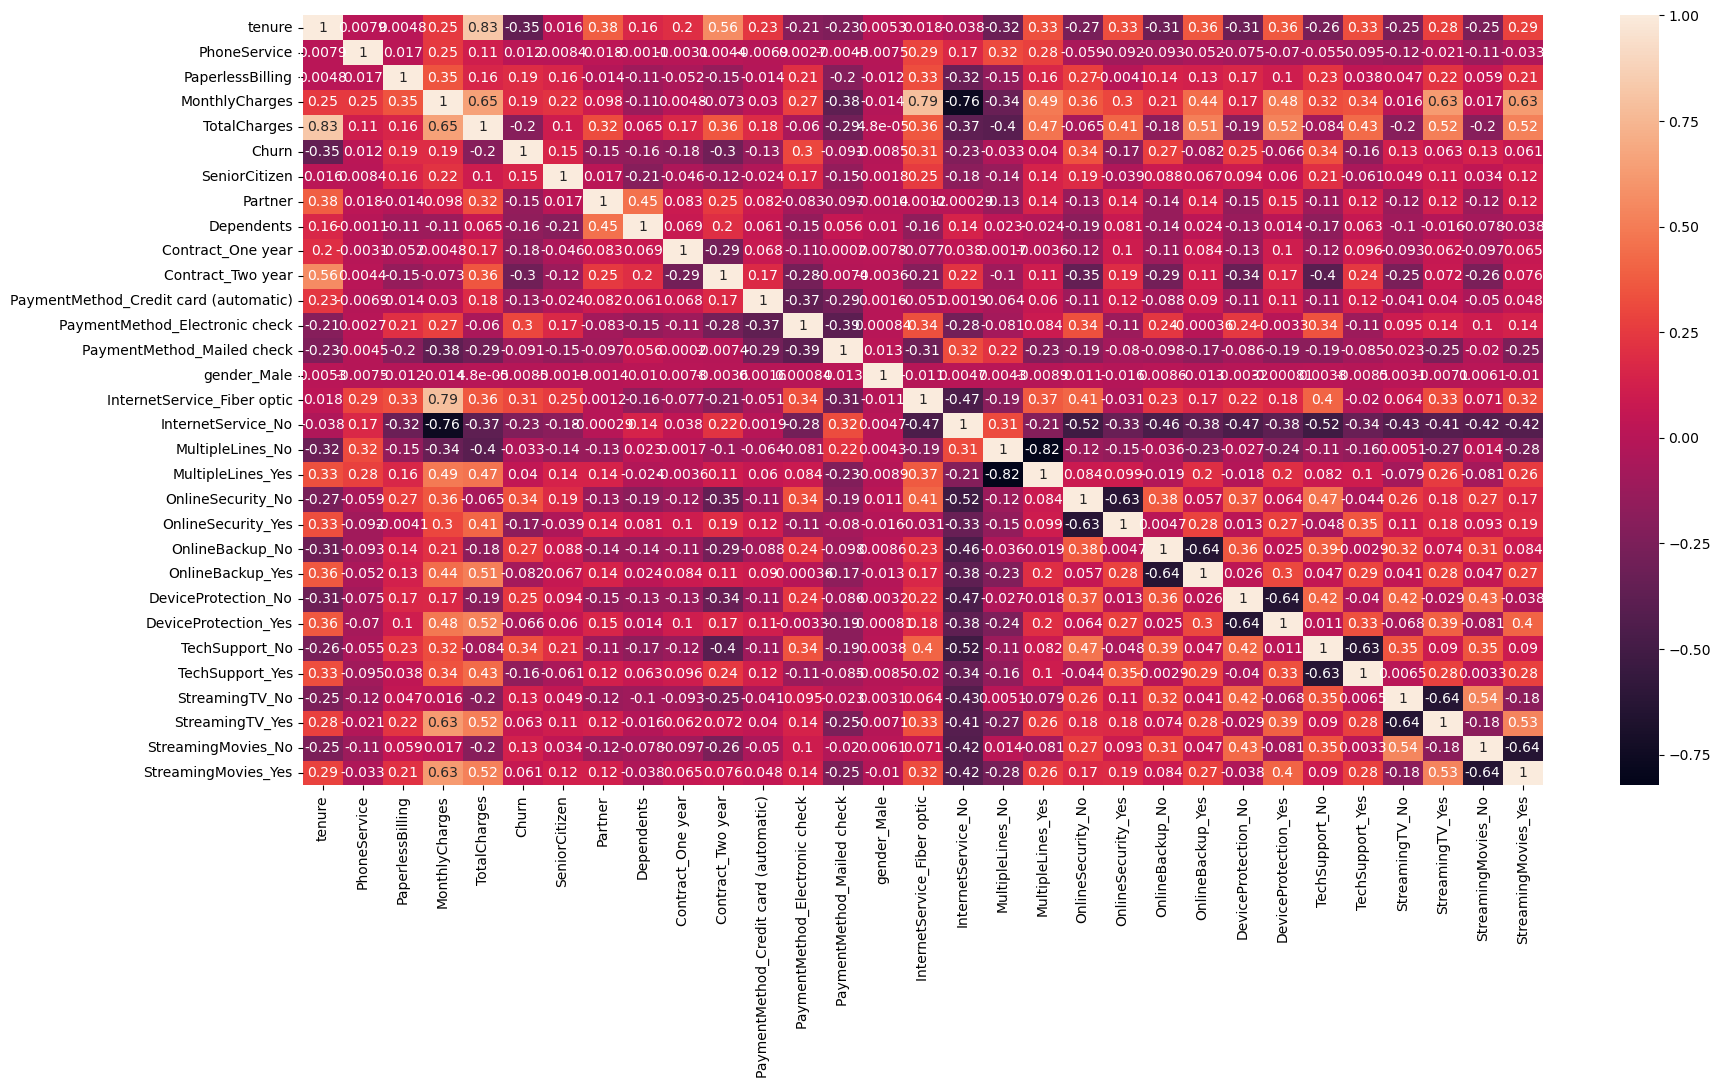

In [198]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [199]:
telecom.corr()['Churn'].sort_values()

tenure                                  -0.354049
Contract_Two year                       -0.301552
InternetService_No                      -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents                              -0.163128
Partner                                 -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No                        -0.032654
gender_Male                             -0.008545
PhoneService                             0.011691
MultipleLines_Yes                        0.040033
StreamingMovies_Yes                      0.060860
StreamingTV_Yes                          0.063254
StreamingTV_No                           0.128435


#### Dropping highly correlated dummy variables

In [200]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

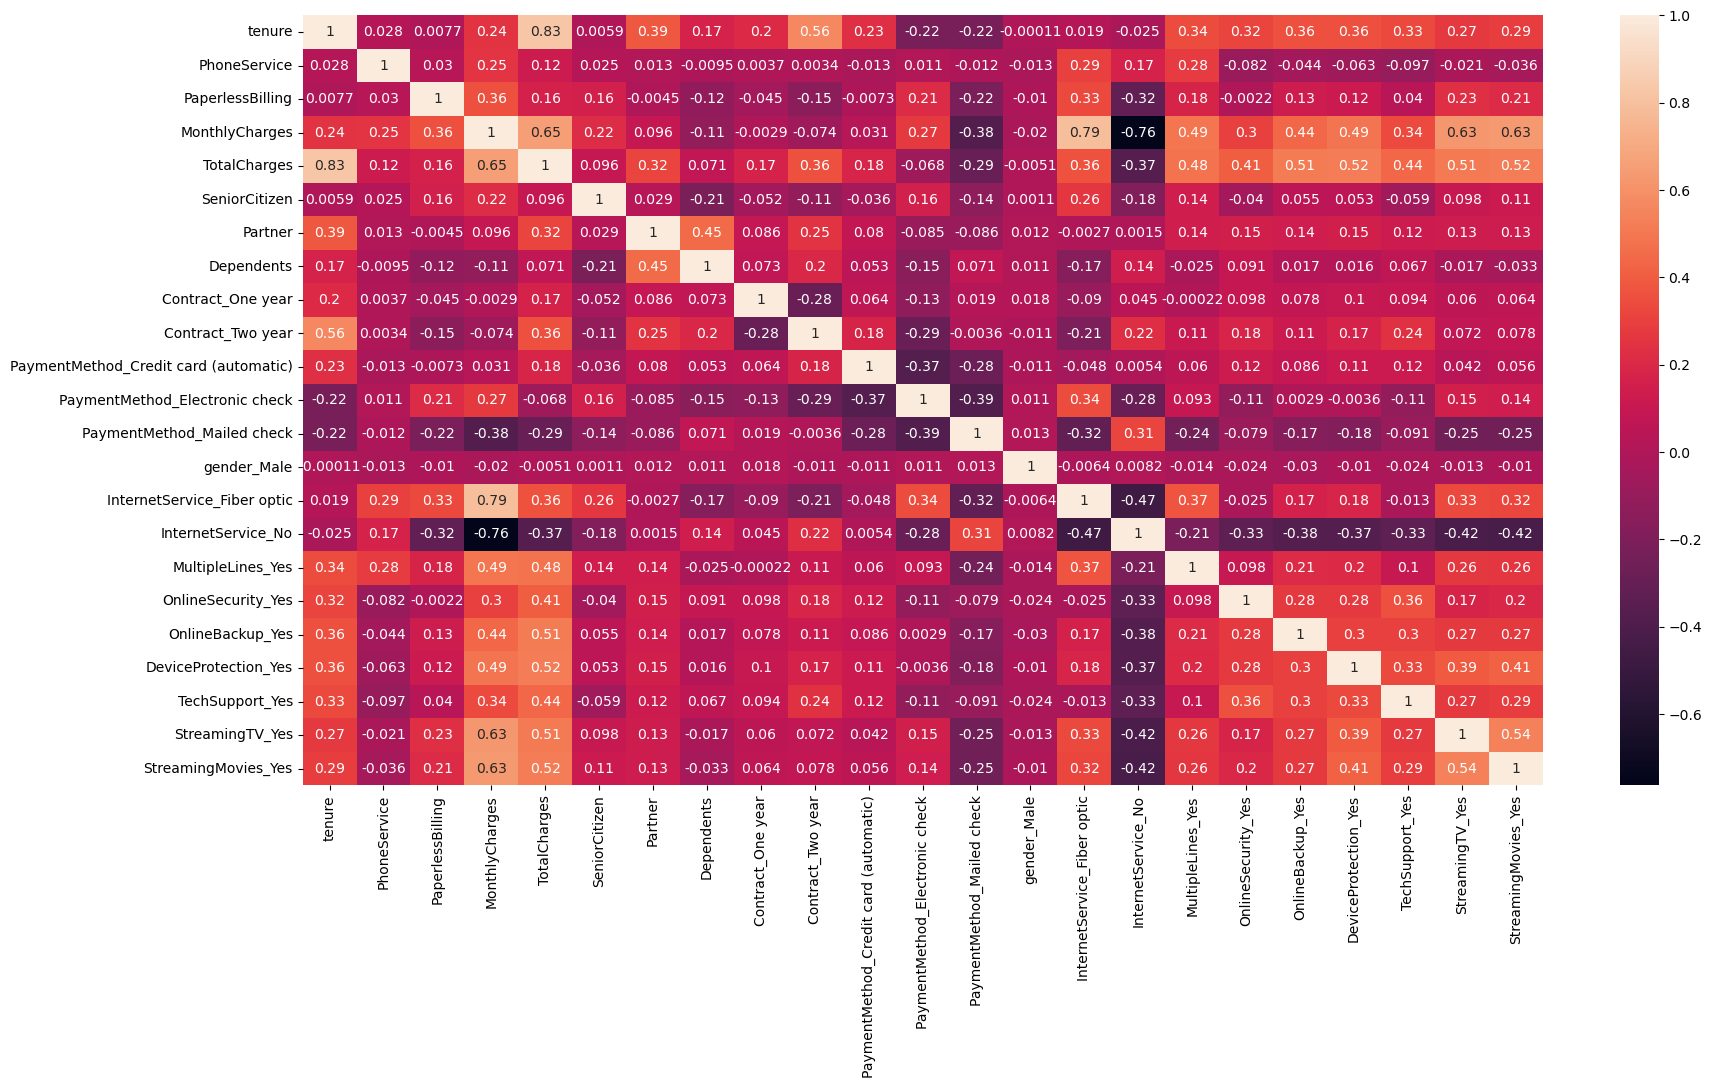

In [201]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building

#### Running Our First Training Model

In [202]:
# Building the model using statsmodels because we need to observe the statistics part
#of the variables(coef, p-value) inorder to determine which features are insignificant.

import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.7
Date:                Tue, 28 Feb 2023   Deviance:                       4069.5
Time:                        10:13:44   Pearson chi2:                 5.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2909
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.6385      1.544     -2.357      0.018      -6.664      -0.613
tenure                                   -1.3683      0.182     -7.525      0.000      -1.725      -1.012
PhoneService                              0.7239      0.783      0.925      0.355      -0.811       2.258
PaperlessBilling                          0.2710      0.089      3.049      0.002       0.097       0.445
MonthlyCharges                           -1.9520      1.157     -1.686      0.092      -4.221       0.317
TotalCharges                              0.6290      0.192      3.270      0.001       0.252       1.006
SeniorCitizen                             0.2769      0.102      2.713      0.007       0.077       0.477
Partner                                  -0.0212      0.094     -0.227      0.820      -0.205       0.162
Dependents                               -0.1135      0.108     -1.049      0.294      -0.326       0.099
Contract_One year                        -0.7595      0.131     -5.811      0.000      -1.016      -0.503
Contract_Two year                        -1.4943      0.216     -6.911      0.000      -1.918      -1.071
PaymentMethod_Credit card (automatic)    -0.0693      0.137     -0.506      0.613      -0.337       0.199
PaymentMethod_Electronic check            0.2910      0.112      2.609      0.009       0.072       0.510
PaymentMethod_Mailed check               -0.0613      0.138     -0.444      0.657      -0.332       0.209
gender_Male                              -0.0225      0.078     -0.290      0.772      -0.175       0.130
InternetService_Fiber optic               2.4496      0.967      2.534      0.011       0.555       4.344
InternetService_No                       -2.4079      0.974     -2.471      0.013      -4.317      -0.498
MultipleLines_Yes                         0.5206      0.215      2.426      0.015       0.100       0.941
OnlineSecurity_Yes                       -0.0753      0.216     -0.349      0.727      -0.498       0.347
OnlineBackup_Yes                          0.1988      0.213      0.935      0.350      -0.218       0.616
DeviceProtection_Yes                      0.2476      0.211      1.171      0.242      -0.167       0.662
TechSupport_Yes                          -0.0860      0.216     -0.398      0.690      -0.509       0.337
StreamingTV_Yes                           0.9323      0.396      2.356      0.018       0.157       1.708
StreamingMovies_Yes                       0.7770      0.394      1.971      0.049       0.004       1.550
=========================================================================================================
"""

- In this table, our key focus area is just the different coefficients and their respective p-values. As you can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

 

- We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Step 8: Feature Selection Using RFE

In [203]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [204]:
from sklearn.feature_selection import RFE
# RFE?
rfe = RFE(estimator = logreg, n_features_to_select = 15, step = 1)# running RFE with 15 variables as output
#step : int or float, default=1
#If greater than or equal to 1, then ``step`` corresponds to the (integer)
# number of features to remove at each iteration.
rfe = rfe.fit(X_train, y_train)

In [205]:
rfe.support_ # For each of 23 features, top 15 are marked as True other as False

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True])

In [206]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 3),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 5),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 6),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 2),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 4),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [207]:
col = X_train.columns[rfe.support_]

In [208]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'gender_Male', 'MultipleLines_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [209]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.5
Date:                Tue, 28 Feb 2023   Deviance:                       4080.9
Time:                        10:13:45   Pearson chi2:                 5.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2893
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4098      0.411     -3.431      0.001      -2.215      -0.604
tenure                            -1.3601      0.178     -7.654      0.000      -1.708      -1.012
PhoneService                      -0.3889      0.268     -1.450      0.147      -0.915       0.137
PaperlessBilling                   0.2869      0.088      3.244      0.001       0.114       0.460
MonthlyCharges                    -0.1696      0.323     -0.526      0.599      -0.802       0.463
TotalCharges                       0.6390      0.190      3.356      0.001       0.266       1.012
SeniorCitizen                      0.3073      0.099      3.090      0.002       0.112       0.502
Contract_One year                 -0.7910      0.130     -6.088      0.000      -1.046      -0.536
Contract_Two year                 -1.5314      0.215     -7.106      0.000      -1.954      -1.109
PaymentMethod_Electronic check     0.3413      0.083      4.128      0.000       0.179       0.503
InternetService_Fiber optic        1.0134      0.292      3.475      0.001       0.442       1.585
InternetService_No                -0.9338      0.334     -2.794      0.005      -1.589      -0.279
OnlineSecurity_Yes                -0.3796      0.113     -3.374      0.001      -0.600      -0.159
TechSupport_Yes                   -0.3944      0.115     -3.421      0.001      -0.620      -0.168
StreamingTV_Yes                    0.3458      0.146      2.366      0.018       0.059       0.632
StreamingMovies_Yes                0.1904      0.145      1.311      0.190      -0.094       0.475
==================================================================================================
"""

In [210]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2790    0.096138
898     0.468900
3965    0.379251
5201    0.125452
1274    0.075779
2517    0.711250
6259    0.015394
1653    0.003169
3432    0.013983
4391    0.325903
dtype: float64

In [211]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1 , 0.47, 0.38, 0.13, 0.08, 0.71, 0.02, 0.  , 0.01, 0.33])

In [212]:
y_train[:10]

2790    1
898     1
3965    0
5201    0
1274    0
2517    1
6259    0
1653    0
3432    0
4391    0
Name: Churn, dtype: int64

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [213]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.096138,2790
1,1,0.468900,898
2,0,0.379251,3965
3,0,0.125452,5201
4,0,0.075779,1274


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [214]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Churn,Churn_Prob,CustID,predicted
0,1,0.096138,2790,0
1,1,0.468900,898,0
2,0,0.379251,3965,0
3,0,0.125452,5201,0
4,0,0.075779,1274,0
5,1,0.711250,2517,1
6,0,0.015394,6259,0
7,0,0.003169,1653,0
8,0,0.013983,3432,0
9,0,0.325903,4391,0


### Using Confusion Matrix 
- To check how well our model is performing on test set in classifying them correctly

In [215]:
from sklearn import metrics

In [216]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3176  407]
 [ 568  771]]


In [217]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [218]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8019097927671678


### Checking VIF and then Manual Feature Elimination using VIF and p-value

- Recall that we had used RFE to select 15 features. 
- But as you saw in the pairwise correlations, there are high values of correlations present between the 15 features, i.e. there is still some multicollinearity among the features. 
- So you definitely need to check the VIFs as well to further eliminate the redundant variables. 
- VIF  calculates how well one independent variable is explained by all the other independent variables combined. And its formula is given as:
             
     VIF<sub>i</sub> = 1 / 1 - R<sub>i</sub><sup>2</sup>

where 'i' refers to the i<sup>th</sup> variable which is being represented as a combination of rest of the independent variables.

In [219]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [220]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,13.14
4,TotalCharges,10.37
1,PhoneService,7.91
0,tenure,7.00
9,InternetService_Fiber optic,6.86
10,InternetService_No,6.18
7,Contract_Two year,3.35
2,PaperlessBilling,2.90
13,StreamingTV_Yes,2.89
14,StreamingMovies_Yes,2.88


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that.

In [221]:
# pd.DataFrame.drop?
col = col.drop('MonthlyCharges',1)
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [222]:
#### Rebuilding the model after removing MonthlyCharges Column

In [223]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.6
Date:                Tue, 28 Feb 2023   Deviance:                       4081.2
Time:                        10:13:45   Pearson chi2:                 5.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2892
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2121      0.165     -7.352      0.000      -1.535      -0.889
tenure                            -1.3498      0.176     -7.652      0.000      -1.696      -1.004
PhoneService                      -0.5043      0.154     -3.270      0.001      -0.807      -0.202
PaperlessBilling                   0.2853      0.088      3.228      0.001       0.112       0.459
TotalCharges                       0.6121      0.183      3.341      0.001       0.253       0.971
SeniorCitizen                      0.3064      0.099      3.080      0.002       0.111       0.501
Contract_One year                 -0.7921      0.130     -6.098      0.000      -1.047      -0.538
Contract_Two year                 -1.5321      0.215     -7.113      0.000      -1.954      -1.110
PaymentMethod_Electronic check     0.3407      0.083      4.121      0.000       0.179       0.503
InternetService_Fiber optic        0.8729      0.116      7.516      0.000       0.645       1.101
InternetService_No                -0.7803      0.163     -4.792      0.000      -1.099      -0.461
OnlineSecurity_Yes                -0.4061      0.101     -4.036      0.000      -0.603      -0.209
TechSupport_Yes                   -0.4221      0.103     -4.115      0.000      -0.623      -0.221
StreamingTV_Yes                    0.2883      0.097      2.979      0.003       0.099       0.478
StreamingMovies_Yes                0.1336      0.097      1.378      0.168      -0.056       0.324
==================================================================================================
"""

In [224]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [225]:
y_train_pred[:10]

array([0.1 , 0.46, 0.39, 0.12, 0.07, 0.71, 0.02, 0.  , 0.01, 0.32])

In [226]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [227]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.095320,2790,0
1,1,0.460954,898,0
2,0,0.385333,3965,0
3,0,0.124878,5201,0
4,0,0.073242,1274,0


In [228]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8013002844372207


So overall the accuracy hasn't dropped much, previously it was 81%

After model building again looking for VIF's to find whether any input's are correlated

In [229]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,7.89
3,TotalCharges,7.75
0,tenure,6.76
8,InternetService_Fiber optic,4.14
9,InternetService_No,3.26
6,Contract_Two year,3.24
2,PaperlessBilling,2.75
13,StreamingMovies_Yes,2.70
12,StreamingTV_Yes,2.68
11,TechSupport_Yes,2.02


In [230]:
# Let's drop TotalCharges as it has high VIF value.
col = col.drop('TotalCharges',1)
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

#### Rebuilding the model after removing TotalCharges Column

In [231]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.4
Date:                Tue, 28 Feb 2023   Deviance:                       4092.9
Time:                        10:13:45   Pearson chi2:                 4.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2875
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3688      0.156     -8.768      0.000      -1.675      -1.063
tenure                            -0.8077      0.061    -13.160      0.000      -0.928      -0.687
PhoneService                      -0.3827      0.147     -2.597      0.009      -0.672      -0.094
PaperlessBilling                   0.2827      0.088      3.205      0.001       0.110       0.456
SeniorCitizen                      0.3143      0.100      3.146      0.002       0.118       0.510
Contract_One year                 -0.7884      0.129     -6.113      0.000      -1.041      -0.536
Contract_Two year                 -1.5067      0.213     -7.060      0.000      -1.925      -1.088
PaymentMethod_Electronic check     0.3320      0.083      4.009      0.000       0.170       0.494
InternetService_Fiber optic        1.0097      0.108      9.326      0.000       0.797       1.222
InternetService_No                -0.8257      0.162     -5.105      0.000      -1.143      -0.509
OnlineSecurity_Yes                -0.3704      0.100     -3.695      0.000      -0.567      -0.174
TechSupport_Yes                   -0.3806      0.102     -3.732      0.000      -0.580      -0.181
StreamingTV_Yes                    0.3604      0.094      3.819      0.000       0.175       0.545
StreamingMovies_Yes                0.2097      0.094      2.225      0.026       0.025       0.394
==================================================================================================
"""

In [232]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [233]:
y_train_pred[:10]

array([0.08, 0.51, 0.34, 0.12, 0.06, 0.71, 0.02, 0.01, 0.01, 0.33])

In [234]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [235]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.083227,2790,0
1,1,0.507423,898,1
2,0,0.335893,3965,0
3,0,0.121099,5201,0
4,0,0.060270,1274,0


In [236]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8010971149939049


So overall the accuracy hasn't dropped much, previously it was 81%

After model building again looking for VIF's to find whether any input's are correlated

In [237]:
# Create a dataframe that will contain the names of all the faeture variables and their respective VIF
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,PhoneService,7.86
7,InternetService_Fiber optic,3.57
5,Contract_Two year,3.14
8,InternetService_No,2.94
2,PaperlessBilling,2.70
12,StreamingMovies_Yes,2.60
11,StreamingTV_Yes,2.58
10,TechSupport_Yes,1.99
0,tenure,1.98
4,Contract_One year,1.89


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [238]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted, labels=[1,0]))

[[ 754  585]
 [ 394 3189]]


In [239]:
# Predicted     not_churn    churn
# Actual
# not_churn       3278       357 
# churn          597         690  

Confusion matrix, without normalization
[[ 754  585]
 [ 394 3189]]


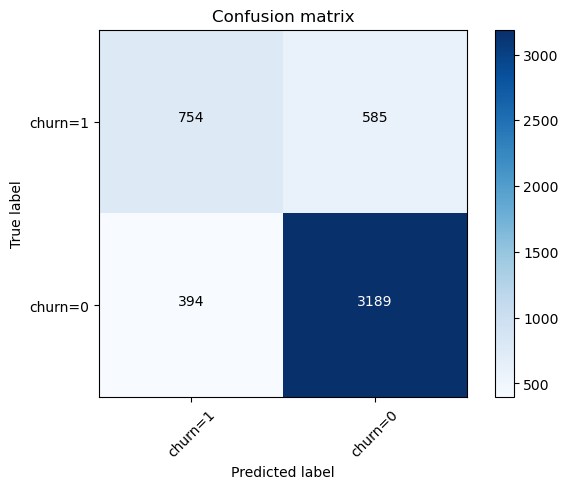

In [240]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

From the table above, you can see that there are 597 + 690  = 1287 actual ‘churn’ customers, so ideally the model should predict all of them as ‘churn’ (i.e. corresponding to the business problem above). But out of these 1287, the current model only predicts 690 as ‘churn’. Thus, only 690 out of 1287, or only about 53% of ‘churn’ customers, will be predicted by the model as ‘churn’. This is very risky - the company won’t be able to roll out offers to the rest of 47% ‘churn’ customers and they could switch to a competitor!
 

So although the accuracy is about 80%, the model only predicts 53% of churn cases correctly.
#### So we cannot only rely only accuracy_score measure we need to find other useful and important metrics aswell.

#### The other useful metrics are Sensitivity, Specificity
`Sensitivity` is defined as:

Sensitivity = Number of actual 'Yes'(1/churn) correctly predicted.
              ----------------------------------------------------
              Total no of "Yes's" correctly predicted.

i.e., Sensitivity =    TP 
                     -------
                     TP + FN
The real calculation is, 
   Sensitivity =     690         =  690      = 0.5361 (53.61%)
                 ------------      -----
                   690 + 597        1287 
                 

Specificity is defined as:

Specificity = Number of actual 'No'(0/Not churn) correctly predicted.
              ----------------------------------------------------
              Total no of "No's" correctly predicted.

i.e., Sensitivity =    TN
                     -------
                     TN + FP
The real calculation is, 
   Sensitivity =     3278         =  3278     = 0.9017 (90.17%)
                 ------------      -----
                   3278 + 357        3635 

In [242]:
# Let's look at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3189  394]
 [ 585  754]]


In [243]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8010971149939049

## Metricx beyond simply accuracy

In [245]:
TP=confusion[1,1]# true positives
TN=confusion[0,0]# true negatives
FP=confusion[0,1] # false positives
FN=confusion[1,0]# False negatives


In [246]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5631067961165048

In [251]:
## Let's see the sensitivity of our logistic regression model
TN/float(TN+FP)

0.8900362824448786

In [252]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10996371755512141


In [253]:
# positive predictive value 
print (TP / float(TP+FP))

0.6567944250871081


So our model seems to have high accuracy (80,1%) and high specificity (89,0%), but low sensitivity (56,31%) and since we're interested in identifying the customers which might churn, we clearly need to deal with this

## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [254]:
# Defining Function to draw the ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs ) # ROC Curve Area
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--') # plotting center diagonal
    plt.xlim([0.0, 1.0]) # X-limits
    plt.ylim([0.0, 1.05]) # Y-limits
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [255]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

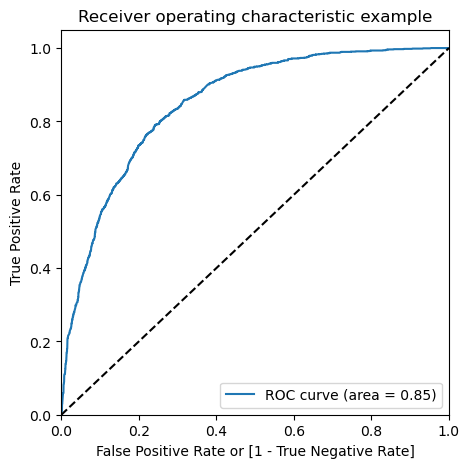

In [256]:
# Giving the actual Churn values and the respective Churn Probabilities
# to the function to the curve.
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Interpreting the ROC curve
<b>The 45<sup>o</sup> Diagonal</b>

- For a completely random model, the ROC curve will pass through the `45-degree` line that has been shown in the graph above
- In the `best case` it passes through the `upper left corner` of the graph and in `worst case` it passed `near the diagonal` which we do not to have. 
- So the least area that a ROC curve can have is 0.5, and the highest area it can have is 1.

<b>The Sensitivity vs Specificity Trade-off</b>

- The ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. 
- As you can see, on the Y-axis, you have the values of Sensitivity (Sensitivity / TPR to calculate the rate of correctly predicted TP's).
- And on the X-axis, you have the value of FPR or (1 - Specificity) because FPR = FP/FP+TN, Specificity = TN/FP+TN so then <u>`FPR = 1-Specificity`</u>.

- Notice that in the curve when `Sensitivity is increasing`, (1 - Specificity) is also increasing, And since, (1 - Specificity) is increasing, it simply means that `Specificity is decreasing`. 

<b>Area Under the Curve</b>

By determining the area under the curve (AUC) of a ROC curve, you can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be your model

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

(Xác suất ngưỡng tối ưu là thăm dò mà chúng ta có được độ nhạy và độ đặc hiệu cân bằng)

In [257]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.083227,2790,0,1,0,0,0,0,0,0,0,0,0
1,1,0.507423,898,1,1,1,1,1,1,1,0,0,0,0
2,0,0.335893,3965,0,1,1,1,1,0,0,0,0,0,0
3,0,0.121099,5201,0,1,1,0,0,0,0,0,0,0,0
4,0,0.060270,1274,0,1,0,0,0,0,0,0,0,0,0


In [258]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.272044  1.000000  0.000000
0.1   0.1  0.617635  0.949963  0.493441
0.2   0.2  0.716172  0.867812  0.659503
0.3   0.3  0.767574  0.784167  0.761373
0.4   0.4  0.786266  0.666916  0.830868
0.5   0.5  0.801097  0.563107  0.890036
0.6   0.6  0.791954  0.411501  0.934133
0.7   0.7  0.774279  0.228529  0.978231
0.8   0.8  0.736692  0.039582  0.997209
0.9   0.9  0.727956  0.000000  1.000000


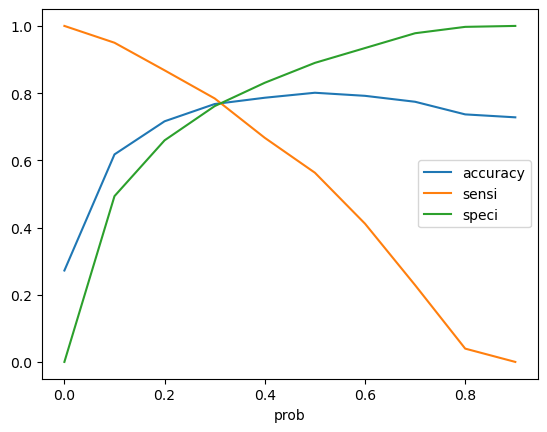

In [259]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


As you can see, at about a `threshold of 0.3`, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 77-78%.

(Như bạn có thể thấy, ở ngưỡng 0,3, các đường cong về độ chính xác, độ nhạy và độ đặc hiệu giao nhau và tất cả chúng đều có giá trị khoảng 77-78%.)

In [260]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.083227,2790,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.507423,898,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.335893,3965,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.121099,5201,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.060270,1274,0,1,0,0,0,0,0,0,0,0,0,0


In [261]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7675741568468102

In [267]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_predicted, labels=[1,0]))

[[1050  289]
 [ 855 2728]]


Confusion matrix, without normalization
[[ 754  585]
 [ 394 3189]]


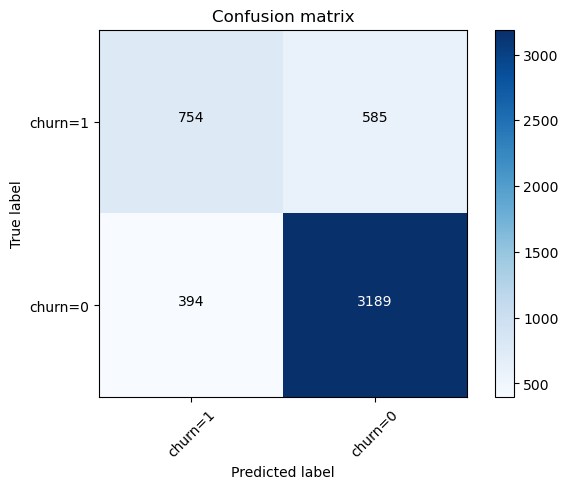

In [269]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [270]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [271]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.784167289021658

In [272]:
# Let us calculate specificity
TN / float(TN+FP)

0.7613731509907898

In [273]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23862684900921016


In [274]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5511811023622047


In [275]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9042094796155121


## Precision and Recall

You might be wondering, if these are almost the same, then why even study 
them separately? The main reason behind this is that in the industry, some 
businesses follow the 'Sensitivity-Specificity' view and some other businesses 
follow the 'Precision-Recall' view and hence, will be helpful for you if you know 
both these standard pairs of metrics.

In [282]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3189,  394],
       [ 585,  754]], dtype=int64)

In [283]:
print (classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3583
           1       0.66      0.56      0.61      1339

    accuracy                           0.80      4922
   macro avg       0.75      0.73      0.74      4922
weighted avg       0.79      0.80      0.80      4922



### Precision and recall tradeoff

So similar to the sensitivity-specificity tradeoff, there is a tradeoff between precision and recall as well.

In [284]:
from sklearn.metrics import precision_recall_curve

In [285]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       0
        ..
 4917    0
 4918    0
 4919    1
 4920    0
 4921    1
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 4917    0
 4918    1
 4919    1
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [286]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

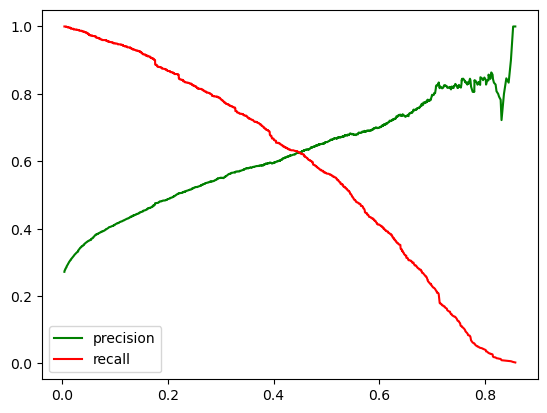

In [287]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['precision','recall'],loc='lower left')
plt.show()

- When using the sensitivity-specificity tradeoff, we found out that the optimal cutoff point was 0.3.
- The optimal cutoff point is where the values of precision and recall will be equal. 
- This is similar to what we saw in the sensitivity-specificity tradeoff curve as well. 
- So, when precision and recall are both around 0.62, the two curves are intersecting. And at this place, if we extend the line to the X-axis as given, we can see that the threshold value is 0.42.

### Step 11: Making predictions on the test set

In [288]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [289]:
X_test = X_test[col]
X_test.head()

,tenure,PhoneService,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
4253,-0.420537,1,1,0,0,0,1,1,0,0,0,1,0
2914,-0.011881,1,1,0,1,0,0,0,0,0,0,1,1
1569,-0.706597,1,0,0,0,0,1,0,0,0,0,0,0
5227,-1.033522,1,0,0,0,0,1,1,0,0,0,1,1
4427,0.682834,1,0,0,0,1,0,1,0,0,1,1,1


In [290]:
# Adding constant to test as we did same on train b/c we are using statsmodel.
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [292]:
y_test_pred = res.predict(X_test_sm)

In [293]:
y_test_pred[:10]

4253    0.639443
2914    0.157433
1569    0.299687
5227    0.730077
4427    0.068460
5879    0.022980
155     0.587674
109     0.004521
5023    0.712126
5257    0.646075
dtype: float64

In [294]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [295]:
# Let's see the head
y_pred_1.head()

,0
4253,0.639443
2914,0.157433
1569,0.299687
5227,0.730077
4427,0.068460


In [296]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
4253,0
2914,0
1569,0
5227,0
4427,0


In [297]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

,Churn,CustID
4253,0,4253
2914,0,2914
1569,0,1569
5227,0,5227
4427,0,4427
...,...,...
4421,0,4421
19,0,19
4221,0,4221
5896,0,5896


In [298]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [299]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [300]:
y_pred_final.head()

,Churn,CustID,0
0,0,4253,0.639443
1,0,2914,0.157433
2,0,1569,0.299687
3,0,5227,0.730077
4,0,4427,0.068460


In [301]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [302]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [303]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,4253,0,0.639443
1,2914,0,0.157433
2,1569,0,0.299687
3,5227,0,0.730077
4,4427,0,0.068460


In [304]:
# Applying 0.3 trade-off same applied to training as well
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [305]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,4253,0,0.639443,1
1,2914,0,0.157433,0
2,1569,0,0.299687,0
3,5227,0,0.730077,1
4,4427,0,0.068460,0


In [306]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7639810426540284

In [310]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted, labels=[1,0]))

[[ 396  134]
 [ 364 1216]]


Confusion matrix, without normalization
[[ 396  134]
 [ 364 1216]]


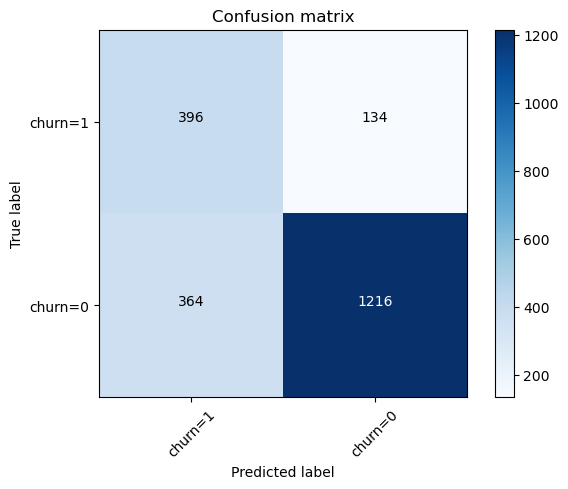

In [312]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [313]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [314]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7471698113207547

In [315]:
# Let us calculate specificity
TN / float(TN+FP)

0.769620253164557

- So first, classes were assigned to all the customers in the test data set. - For this, a probability cutoff of 0.5 was used. The model thus made, was very accurate (Accuracy = 80%), but it had a very low sensitivity (53%).
- Thus, a different cutoff was tried out, i.e. 0.3, which resulted in a model with slightly lower accuracy (77%), but a much better sensitivity (78%).
- Hence, we should not just blindly use 0.5 as the cutoff for probability every time we make a model. 
- Business understanding must be applied. Here, that means playing around with the cutoff, until you get the most useful model.

So to summarise, the steps that we performed throughout the model building and model evaluation were:

1. Data cleaning and preparation
   1. Combining three dataframes
   2. Handling categorical variables
         1. Mapping categorical variables to integers
         2. Dummy variable creation
   3. Handling missing values
2. Test-train split and scaling
3. Model Building
   1. Feature elimination based on correlations
   2. Feature selection using RFE (Coarse Tuning)
   3. Manual feature elimination (using p-values and VIFs)
4. Model Evaluation
   1. Accuracy
   2. Sensitivity and Specificity
   3. Optimal cut-off using ROC curve
   4. Precision and Recall
5. Predictions on the test set